In [4]:
# 设置工作路径

setwd("/home/luojiawei/mimic3_Miss_project/")

In [5]:
# 加载库

library(stringr)
library(magrittr)
library(lubridate)
library(rlist)
library(data.table)
library(naniar)
library(mice)
library(pROC)
library(imputeTS)
library(DMwR2)
library(pheatmap)


source("./util_funcs.R")


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘data.table’


The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year



Attaching package: ‘mice’


The following object is masked from ‘package:stats’:

    filter


The following objects are masked from ‘package:base’:

    cbind, rbind


Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



### labevents, chartevents, outputevents中选中的 itemid

In [6]:
itemid_chartevents<-c(723,454,184,223900,223901,220739,51,442,455,6701,220179,220050,211,220045,678,223761,676,223762,223835,3420,3422,190)
itemid_labevents<-c(50821,50816,51006,51300,51301,50882,950824,50983,50822,50971,50885)
itemid_outputevents<-c(40055,43175,40069,40094,40715,40473,40085,40057,40056,40405,40428,40086,40096,40651,226559,226560,226561,226584,226563,226564,226565,226567,226557,226558,227488,227489)

In [4]:
d_labitems<-fread("/home/luojiawei/mimic3/mimic3_data/D_LABITEMS.csv",header=T,fill=T)

In [5]:
d_labitems[1:2,]

ROW_ID,ITEMID,LABEL,FLUID,CATEGORY,LOINC_CODE
<int>,<int>,<chr>,<chr>,<chr>,<chr>
546,51346,Blasts,Cerebrospinal Fluid (CSF),Hematology,26447-3
547,51347,Eosinophils,Cerebrospinal Fluid (CSF),Hematology,26451-5


In [6]:
d_labitems[d_labitems$ITEMID %in% itemid_labevents,]

ROW_ID,ITEMID,LABEL,FLUID,CATEGORY,LOINC_CODE
<int>,<int>,<chr>,<chr>,<chr>,<chr>
17,50816,Oxygen,Blood,Blood Gas,19994-3
22,50821,pO2,Blood,Blood Gas,11556-8
23,50822,"Potassium, Whole Blood",Blood,Blood Gas,6298-4
83,50882,Bicarbonate,Blood,Chemistry,1963-8
86,50885,"Bilirubin, Total",Blood,Chemistry,1975-2
172,50971,Potassium,Blood,Chemistry,2823-3
184,50983,Sodium,Blood,Chemistry,2951-2
206,51006,Urea Nitrogen,Blood,Chemistry,3094-0
500,51300,WBC Count,Blood,Hematology,26464-8


In [7]:
d_items<-fread("/home/luojiawei/mimic3/mimic3_data/D_ITEMS.csv",header=T,fill=T)

In [8]:
d_items[d_items$ITEMID %in% c(itemid_chartevents,itemid_outputevents),]

ROW_ID,ITEMID,LABEL,ABBREVIATION,DBSOURCE,LINKSTO,CATEGORY,UNITNAME,PARAM_TYPE,CONCEPTID
<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>
57,51,Arterial BP [Systolic],,carevue,chartevents,,,,NA
185,184,Eye Opening,,carevue,chartevents,,,,NA
191,190,FiO2 Set,,carevue,chartevents,,,,NA
212,211,Heart Rate,,carevue,chartevents,,,,NA
408,442,Manual BP [Systolic],,carevue,chartevents,,,,NA
418,454,Motor Response,,carevue,chartevents,,,,NA
419,455,NBP [Systolic],,carevue,chartevents,,,,NA
627,676,Temperature C,,carevue,chartevents,,,,NA
629,678,Temperature F,,carevue,chartevents,,,,NA


In [9]:
chartevents<-fread("/home/luojiawei/mimic3/mimic3_data/CHARTEVENTS.csv",header=T,fill=T)

In [274]:
chartevents[1:4,]

ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,ITEMID,CHARTTIME,STORETIME,CGID,VALUE,VALUENUM,VALUEUOM,WARNING,ERROR,RESULTSTATUS,STOPPED
<int>,<int>,<int>,<int>,<int>,<dttm>,<dttm>,<int>,<chr>,<dbl>,<chr>,<int>,<int>,<chr>,<chr>
788,36,165660,241249,223834,2134-05-12 12:00:00,2134-05-12 13:56:00,17525,15,15.00,L/min,0,0,,
789,36,165660,241249,223835,2134-05-12 12:00:00,2134-05-12 13:56:00,17525,100,100.00,,0,0,,
790,36,165660,241249,224328,2134-05-12 12:00:00,2134-05-12 12:18:00,20823,.37,0.37,,0,0,,
791,36,165660,241249,224329,2134-05-12 12:00:00,2134-05-12 12:19:00,20823,6,6.00,min,0,0,,


In [275]:
chartevents<-chartevents[which(chartevents$ITEMID %in% itemid_chartevents),]

In [276]:
dim(chartevents)

[1] 22432261       15

- 去除 hadm_id 或 subject_id 缺失的

In [277]:
chartevents<-chartevents[which(!is.na(chartevents$SUBJECT_ID) & !is.na(chartevents$HADM_ID)),]

In [278]:
dim(chartevents)

[1] 22432261       15

In [279]:
fwrite(chartevents,file="./chartevents.csv",row.names=F)

In [2271]:
# chartevents<-fread("./chartevents.csv",header=T,fill=T)

In [2272]:
chartevents[which(chartevents$ITEMID==223900)[1:4],]

HADM_ID,ROW_ID,SUBJECT_ID,ICUSTAY_ID,ITEMID,CHARTTIME,STORETIME,CGID,VALUE,VALUENUM,VALUEUOM,WARNING,ERROR,RESULTSTATUS,STOPPED,ADMITTIME,TIME
<int>,<int>,<int>,<int>,<int>,<dttm>,<dttm>,<int>,<chr>,<dbl>,<chr>,<int>,<int>,<lgl>,<chr>,<dttm>,<int>
100009,261426625,533,253656,223900,2162-05-17 18:30:00,2162-05-17 18:56:00,17130,No Response-ETT,1,,0,0,NA,,2162-05-16 15:56:00,27
100009,261426771,533,253656,223900,2162-05-17 20:04:00,2162-05-17 20:05:00,14228,No Response-ETT,1,,0,0,NA,,2162-05-16 15:56:00,28
100009,261426919,533,253656,223900,2162-05-17 23:17:00,2162-05-17 23:18:00,14228,Oriented,5,,0,0,NA,,2162-05-16 15:56:00,31
100009,261427915,533,253656,223900,2162-05-19 08:16:00,2162-05-19 15:17:00,17582,Oriented,5,,0,0,NA,,2162-05-16 15:56:00,64


In [281]:
labevents<-fread("/home/luojiawei/mimic3/mimic3_data/LABEVENTS.csv",header=T,fill=T)

In [282]:
labevents[1:4,]

ROW_ID,SUBJECT_ID,HADM_ID,ITEMID,CHARTTIME,VALUE,VALUENUM,VALUEUOM,FLAG
<int>,<int>,<int>,<int>,<dttm>,<chr>,<dbl>,<chr>,<chr>
281,3,NA,50820,2101-10-12 16:07:00,7.39,7.39,units,
282,3,NA,50800,2101-10-12 18:17:00,ART,NA,,
283,3,NA,50802,2101-10-12 18:17:00,-1,-1.00,mEq/L,
284,3,NA,50804,2101-10-12 18:17:00,22,22.00,mEq/L,


In [283]:
labevents<-labevents[which(labevents$ITEMID %in% itemid_labevents),]

In [284]:
dim(labevents)

[1] 5032016       9

- 去除 hadm_id 或 subject_id 缺失的

In [285]:
labevents<-labevents[which(!is.na(labevents$SUBJECT_ID) & !is.na(labevents$HADM_ID)),]

In [286]:
dim(labevents)

[1] 4099472       9

In [287]:
fwrite(labevents,file="./labevents.csv",row.names=F)

In [2270]:
# labevents<-fread("./labevents.csv",header=T,fill=T)

In [288]:
outputevents<-fread("/home/luojiawei/mimic3/mimic3_data/OUTPUTEVENTS.csv",header=T,fill=T)

In [289]:
outputevents[1:4,]

ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,CHARTTIME,ITEMID,VALUE,VALUEUOM,STORETIME,CGID,STOPPED,NEWBOTTLE,ISERROR
<int>,<int>,<int>,<int>,<dttm>,<int>,<dbl>,<chr>,<dttm>,<int>,<lgl>,<lgl>,<lgl>
344,21219,177991,225765,2142-09-08 10:00:00,40055,200,ml,2142-09-08 12:08:00,17269,NA,NA,NA
345,21219,177991,225765,2142-09-08 12:00:00,40055,200,ml,2142-09-08 12:08:00,17269,NA,NA,NA
346,21219,177991,225765,2142-09-08 13:00:00,40055,120,ml,2142-09-08 13:39:00,17269,NA,NA,NA
347,21219,177991,225765,2142-09-08 14:00:00,40055,100,ml,2142-09-08 16:17:00,17269,NA,NA,NA


In [290]:
outputevents<-outputevents[which(outputevents$ITEMID %in% itemid_outputevents),]

- 去除 hadm_id 或 subject_id 缺失的

In [291]:
outputevents<-outputevents[which(!is.na(outputevents$SUBJECT_ID) & !is.na(outputevents$HADM_ID)),]

In [292]:
dim(outputevents)

[1] 3396821      13

In [293]:
fwrite(outputevents,file="./outputevents.csv",row.names=F)

In [2269]:
# outputevents<-fread("./outputevents.csv",header=T,fill=T)

### 样本筛选

- 去除有多次入院的患者
- 去除18岁以下的患者

In [10]:
admissions<-fread("/home/luojiawei/mimic3/mimic3_data/ADMISSIONS.csv",header=T,fill=T)

Warning message in fread("/home/luojiawei/mimic3/mimic3_data/ADMISSIONS.csv", header = T, :
“Previous fread() session was not cleaned up properly. Cleaned up ok at the beginning of this fread() call.”


In [11]:
print("总的admission数量:")
print(nrow(admissions))
print("admissions表中总的患者数量:")
print(length(unique(admissions$SUBJECT_ID)))

[1] "总的admission数量:"
[1] 58976
[1] "admissions表中总的患者数量:"
[1] 46520


In [12]:
admissions[1:4,]

ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
<int>,<int>,<int>,<dttm>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dttm>,<dttm>,<chr>,<int>,<int>
21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,NA,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,,UNOBTAINABLE,MARRIED,WHITE,2196-04-09 10:06:00,2196-04-09 13:24:00,BENZODIAZEPINE OVERDOSE,0,1
22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,NA,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,,CATHOLIC,MARRIED,WHITE,NA,NA,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS GRAFT/SDA,0,1
23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,NA,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,NA,NA,BRAIN MASS,0,1
24,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,NA,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Private,,PROTESTANT QUAKER,SINGLE,WHITE,NA,NA,INTERIOR MYOCARDIAL INFARCTION,0,1


In [13]:
ad_tab<-table(admissions$SUBJECT_ID)

In [14]:
admissions<-admissions[which(admissions$SUBJECT_ID %in% names(ad_tab[ad_tab==1])),]

In [15]:
print("去除超过1次入院后的总的admission数量:")
print(nrow(admissions))
print("去除超过1次入院后的admissions表中总的患者数量:")
print(length(unique(admissions$SUBJECT_ID)))

[1] "去除超过1次入院后的总的admission数量:"
[1] 38983
[1] "去除超过1次入院后的admissions表中总的患者数量:"
[1] 38983


In [16]:
patients<-fread("/home/luojiawei/mimic3/mimic3_data/PATIENTS.csv",header=T,fill=T)

In [17]:
patients[1:4,]

ROW_ID,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
<int>,<int>,<chr>,<dttm>,<dttm>,<dttm>,<dttm>,<int>
234,249,F,2075-03-13,NA,NA,NA,0
235,250,F,2164-12-27,2188-11-22,2188-11-22,NA,1
236,251,M,2090-03-15,NA,NA,NA,0
237,252,M,2078-03-06,NA,NA,NA,0


In [18]:
patients<-patients[which(patients$SUBJECT_ID %in% admissions$SUBJECT_ID),]

In [19]:
print("patients表中的患者数量:")
print(nrow(patients))

[1] "patients表中的患者数量:"
[1] 38983


In [20]:
base_info<-merge(patients,admissions,by="SUBJECT_ID", all.x=T)

In [2298]:
print("base_info表中的患者数量:")
print(nrow(base_info))

[1] "base_info表中的患者数量:"
[1] 38983


In [2299]:
base_info[1:4,]

SUBJECT_ID,ROW_ID.x,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG,ROW_ID.y,HADM_ID,⋯,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
<int>,<int>,<chr>,<dttm>,<dttm>,<dttm>,<dttm>,<int>,<int>,<int>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<dttm>,<dttm>,<chr>,<int>,<int>
2,1,M,2138-07-17,NA,NA,NA,0,1,163353,⋯,Private,,NOT SPECIFIED,,ASIAN,NA,NA,NEWBORN,0,1
3,2,M,2025-04-11,2102-06-14,NA,2102-06-14,1,2,145834,⋯,Medicare,,CATHOLIC,MARRIED,WHITE,2101-10-20 17:09:00,2101-10-20 19:24:00,HYPOTENSION,0,1
4,3,F,2143-05-12,NA,NA,NA,0,3,185777,⋯,Private,,PROTESTANT QUAKER,SINGLE,WHITE,2191-03-15 13:10:00,2191-03-16 01:10:00,"FEVER,DEHYDRATION,FAILURE TO THRIVE",0,1
5,4,M,2103-02-02,NA,NA,NA,0,4,178980,⋯,Private,,BUDDHIST,,ASIAN,NA,NA,NEWBORN,0,1


In [2300]:
str(base_info)

Classes ‘data.table’ and 'data.frame':	38983 obs. of  26 variables:
 $ SUBJECT_ID          : int  2 3 4 5 6 7 8 9 10 11 ...
 $ ROW_ID.x            : int  1 2 3 4 5 6 7 8 9 10 ...
 $ GENDER              : chr  "M" "M" "F" "M" ...
 $ DOB                 : POSIXct, format: "2138-07-17" "2025-04-11" ...
 $ DOD                 : POSIXct, format: NA "2102-06-14" ...
 $ DOD_HOSP            : POSIXct, format: NA NA ...
 $ DOD_SSN             : POSIXct, format: NA "2102-06-14" ...
 $ EXPIRE_FLAG         : int  0 1 0 0 0 0 0 1 0 1 ...
 $ ROW_ID.y            : int  1 2 3 4 5 6 7 8 9 10 ...
 $ HADM_ID             : int  163353 145834 185777 178980 107064 118037 159514 150750 184167 194540 ...
 $ ADMITTIME           : POSIXct, format: "2138-07-17 19:04:00" "2101-10-20 19:08:00" ...
 $ DISCHTIME           : POSIXct, format: "2138-07-21 15:48:00" "2101-10-31 13:58:00" ...
 $ DEATHTIME           : POSIXct, format: NA NA ...
 $ ADMISSION_TYPE      : chr  "NEWBORN" "EMERGENCY" "EMERGENCY" "NEWBORN" ...


In [2301]:
base_info$AGE<-round(interval(base_info$DOB,base_info$ADMITTIME)/years(1),0)+1

In [2302]:
base_info$TOTAL_LOS<-floor(interval(base_info$ADMITTIME,base_info$DISCHTIME)/hours(1))

- 去除在院时间小于等于48小时的

In [2303]:
base_info<-base_info[base_info$TOTAL_LOS>48,]

In [2304]:
print("去除在院时间小于等于48小时的患者后的总患者人数:")
print(length(unique(base_info$SUBJECT_ID)))

[1] "去除在院时间小于等于48小时的患者后的总患者人数:"
[1] 34754


- 去除入院时间或出院时间缺失的

In [2305]:
base_info<-base_info[which(!is.na(base_info$ADMITTIME) & !is.na(base_info$DISCHTIME)),]

In [2306]:
print("去除入院时间或出院时间缺失的患者后的总患者人数:")
print(length(unique(base_info$SUBJECT_ID)))

[1] "去除入院时间或出院时间缺失的患者后的总患者人数:"
[1] 34754


- 去除年龄小于18岁的

In [2307]:
base_info<-base_info[which(base_info$AGE>=18),]

In [2308]:
print("去除年龄小于18岁的患者后的总患者人数:")
print(length(unique(base_info$SUBJECT_ID)))

[1] "去除年龄小于18岁的患者后的总患者人数:"
[1] 28158


In [2284]:
fwrite(base_info, file="./base_info.csv",row.names=F)

In [2285]:
nrow(base_info)

[1] 28158

In [21]:
# base_info<-fread("./base_info.csv",header=T,fill=T)

### 为 labevents, chartevents, outputevents 匹配入院时间

In [2273]:
labevents<-labevents[which(labevents$HADM_ID %in% base_info$HADM_ID),]

In [2266]:
labevents<-merge(labevents,base_info[,c("HADM_ID","ADMITTIME")],by="HADM_ID",all.x=T)

In [2274]:
labevents$TIME<-round(interval(labevents$ADMITTIME,labevents$CHARTTIME)/hours(1),0)

HADM_ID,ROW_ID,SUBJECT_ID,ITEMID,CHARTTIME,VALUE,VALUENUM,VALUEUOM,FLAG,ADMITTIME.x,TIME,ADMITTIME.y
<int>,<int>,<int>,<int>,<dttm>,<chr>,<dbl>,<chr>,<chr>,<dttm>,<dbl>,<dttm>
100007,14255175,23018,50882,2145-03-30 21:15:00,25,25.0,mEq/L,,2145-03-31 05:33:00,-8,2145-03-31 05:33:00
100007,14255176,23018,50885,2145-03-30 21:15:00,0.3,0.3,mg/dL,,2145-03-31 05:33:00,-8,2145-03-31 05:33:00


In [2275]:
labevents[1:2,]

HADM_ID,ROW_ID,SUBJECT_ID,ITEMID,CHARTTIME,VALUE,VALUENUM,VALUEUOM,FLAG,ADMITTIME,TIME
<int>,<int>,<int>,<int>,<dttm>,<chr>,<dbl>,<chr>,<chr>,<dttm>,<dbl>
100007,14255175,23018,50882,2145-03-30 21:15:00,25,25.0,mEq/L,,2145-03-31 05:33:00,-8
100007,14255176,23018,50885,2145-03-30 21:15:00,0.3,0.3,mg/dL,,2145-03-31 05:33:00,-8


In [2276]:
dim(labevents)

[1] 2300357      11

In [2277]:
fwrite(labevents,file="./labevents.csv",row.names=F)

In [22]:
labevents<-fread("./labevents.csv",header=T, fill=T)

In [2278]:
chartevents<-chartevents[which(chartevents$HADM_ID %in% base_info$HADM_ID),]

In [302]:
chartevents<-merge(chartevents,base_info[,c("HADM_ID","ADMITTIME")],by="HADM_ID",all.x=T)

In [303]:
chartevents$TIME<-round(interval(chartevents$ADMITTIME,chartevents$CHARTTIME)/hours(1),0)

In [2279]:
chartevents[1:3,]

HADM_ID,ROW_ID,SUBJECT_ID,ICUSTAY_ID,ITEMID,CHARTTIME,STORETIME,CGID,VALUE,VALUENUM,VALUEUOM,WARNING,ERROR,RESULTSTATUS,STOPPED,ADMITTIME,TIME
<int>,<int>,<int>,<int>,<int>,<dttm>,<dttm>,<int>,<chr>,<dbl>,<chr>,<int>,<int>,<lgl>,<chr>,<dttm>,<int>
100007,150452482,23018,217937,211,2145-04-01 07:00:00,2145-04-01 07:06:00,14418,77,77,BPM,NA,NA,NA,NotStopd,2145-03-31 05:33:00,25
100007,150452523,23018,217937,184,2145-04-01 08:00:00,2145-04-01 09:14:00,14418,4 Spontaneously,4,,NA,NA,NA,NotStopd,2145-03-31 05:33:00,26
100007,150452527,23018,217937,211,2145-04-01 08:00:00,2145-04-01 09:08:00,14418,80,80,BPM,NA,NA,NA,NotStopd,2145-03-31 05:33:00,26


In [588]:
# unique(outputevents[which(outputevents$ITEMID %in% c("40055","43175","40069","40094","40715","40473","40085","40057","40056","40405","40428","40086","40096","40651","226559","226560","226561","226584","226563","226564","226565","226567","226557","226558","227488","227489")),"VALUEUOM"])
# chartevents[which(chartevents$ITEMID %in% c("50821","50816","223835","3420","3422","190") & chartevents$VALUEUOM=="torr")[1:100],]

# range(chartevents[which(chartevents$ITEMID %in% c("50821","50816","223835","3420","3422","190") & chartevents$VALUEUOM=="torr"),"VALUENUM"], na.rm=T)

# unique(labevents[which(labevents$ITEMID %in% c("50822","50971")),"VALUEUOM"])


unique(chartevents[which(chartevents$ITEMID %in% c("51","442","455","6701","220179","220050")),"VALUEUOM"])


VALUEUOM
<chr>
mmHg
""


In [2280]:
fwrite(chartevents,file="./chartevents.csv",row.names=F)

In [24]:
chartevents<-fread("./chartevents.csv",header=T,fill=T)

In [2281]:
outputevents<-outputevents[which(outputevents$HADM_ID %in% base_info$HADM_ID),]

In [308]:
outputevents<-merge(outputevents,base_info[,c("HADM_ID","ADMITTIME")],by="HADM_ID",all.x=T)

In [309]:
outputevents$TIME<-round(interval(outputevents$ADMITTIME,outputevents$CHARTTIME)/hours(1),0)

In [2282]:
outputevents[1:2,]

HADM_ID,ROW_ID,SUBJECT_ID,ICUSTAY_ID,CHARTTIME,ITEMID,VALUE,VALUEUOM,STORETIME,CGID,STOPPED,NEWBOTTLE,ISERROR,ADMITTIME,TIME
<int>,<int>,<int>,<int>,<dttm>,<int>,<dbl>,<chr>,<dttm>,<int>,<lgl>,<lgl>,<lgl>,<dttm>,<int>
100007,2089751,23018,217937,2145-03-31 12:00:00,40055,80,ml,2145-03-31 12:46:00,18320,NA,NA,NA,2145-03-31 05:33:00,6
100007,2089630,23018,217937,2145-04-03 20:00:00,40069,50,ml,2145-04-03 21:00:00,19087,NA,NA,NA,2145-03-31 05:33:00,86


In [2283]:
fwrite(outputevents,file="./outputevents.csv",row.names=F)

In [25]:
outputevents<-fread("./outputevents.csv", header=T,fill=T)

### 为每个患者生成用于建模的文件

SPAS II 的所有动态变量和静态变量

以小时为采样单位，从患者入院开始，到出院结束

- 动态数据
- 静态数据

### 动态数据

In [715]:
dym_X_list<-list()
n_vec<-c()
time_vec<-c()
set.seed(400)
inds<-sample(1:20000,size=500,replace=F)
for(k in inds){

    cur_hadmid<-base_info$HADM_ID[k]
    cur_labevents<-labevents[which(labevents$HADM_ID==cur_hadmid),]
    cur_chartevents<-chartevents[which(chartevents$HADM_ID==cur_hadmid),]
    cur_outputevents<-outputevents[which(outputevents$HADM_ID==cur_hadmid),]

    cur_time_list<-seq(0,base_info$TOTAL_LOS[base_info$HADM_ID==cur_hadmid],4)
    
    n_vec<-c(n_vec,length(cur_time_list))
    time_vec<-c(time_vec,cur_time_list)
    
    X_lab<-rbind(NULL);X_chart<-rbind(NULL);X_output<-rbind(NULL)
    
    for(i in 1:length(cur_time_list)){

       # 读取当前时间前后2小时的 labevents

       ds_lab <- cur_labevents[cur_labevents$TIME >= (cur_time_list[i] - 2) & cur_labevents$TIME <= (cur_time_list[i] + 2),]
       x_lab<-lapply(itemid_labevents, function(itemid){

              x<-ds_lab$VALUENUM[ds_lab$ITEMID==itemid]
              m<-median(x,na.rm=T)
                if(is.na(m)){
                        return(NA)
                } else{
                        return(m)
                    }
        }) %>% unlist
        X_lab<-rbind(X_lab,x_lab)

        ds_chart<-cur_chartevents[cur_chartevents$TIME >= (cur_time_list[i] - 2) & cur_chartevents$TIME <= (cur_time_list[i] + 2),]
        x_chart<-lapply(itemid_chartevents, function(itemid){

              x<-ds_chart$VALUENUM[ds_chart$ITEMID==itemid]
              m<-median(x,na.rm=T)
                if(is.na(m)){
                        return(NA)
                } else{
                        return(m)
                    }
        }) %>% unlist
        X_chart<-rbind(X_chart,x_chart)

        ds_output<-cur_outputevents[cur_outputevents$TIME >= (cur_time_list[i] - 2) & cur_outputevents$TIME <= (cur_time_list[i] + 2),]
        x_output<-lapply(itemid_outputevents, function(itemid){

              x<-ds_output$VALUE[ds_output$ITEMID==itemid]
              m<-median(x,na.rm=T)
                if(is.na(m)){
                        return(NA)
                } else{
                        return(m)
                    }
        }) %>% unlist
        X_output<-rbind(X_output,x_output)

    }
    
    colnames(X_lab)<-itemid_labevents
    colnames(X_chart)<-itemid_chartevents
    colnames(X_output)<-itemid_outputevents
    row.names(X_lab)<-NULL
    row.names(X_chart)<-NULL
    row.names(X_output)<-NULL
    
    dym_X<-cbind(X_lab,X_chart,X_output)
    colnames(dym_X)<-paste0("v",colnames(dym_X))
    dym_X_list[[k]]<-dym_X
    
    if(k % 100 == 0) print(k)
}


In [2257]:
dim(outputevents)

[1] 2051319      15

In [716]:
dym_X<-as.data.frame(list.rbind(dym_X_list))

In [717]:
dym_X$hadm_id<-rep(base_info$HADM_ID[inds], times=n_vec)
dym_X$time<-time_vec

In [718]:
str(dym_X)

'data.frame':	30390 obs. of  61 variables:
 $ v50821 : num  NA NA NA NA 384 454 465 178 208 NA ...
 $ v50816 : num  NA NA NA NA NA NA NA NA NA NA ...
 $ v51006 : num  19 NA NA NA NA NA 20 21 21 24 ...
 $ v51300 : num  NA NA NA NA NA NA NA NA NA NA ...
 $ v51301 : num  3.7 NA NA NA NA 4.65 3.9 3.85 4 4.9 ...
 $ v50882 : num  26 NA NA NA NA NA 23 28 28 30 ...
 $ v950824: num  NA NA NA NA NA NA NA NA NA NA ...
 $ v50983 : num  139 NA NA NA NA NA 140 142 142 143 ...
 $ v50822 : num  NA NA NA NA 4.2 4.5 4.8 NA NA NA ...
 $ v50971 : num  3.9 NA NA NA NA NA 4.4 3.4 3.4 3.8 ...
 $ v50885 : num  1.4 NA NA NA NA NA 2.8 3.9 3.9 2.1 ...
 $ v723   : num  NA NA NA NA NA 1 1 1 1 1 ...
 $ v454   : num  NA NA NA NA NA 4 4 4 4 5 ...
 $ v184   : num  NA NA NA NA NA 2 2 3 3 3 ...
 $ v223900: num  NA NA NA NA NA NA NA NA NA NA ...
 $ v223901: num  NA NA NA NA NA NA NA NA NA NA ...
 $ v220739: num  NA NA NA NA NA NA NA NA NA NA ...
 $ v51    : num  NA NA NA NA NA ...
 $ v442   : num  NA NA NA NA NA NA NA NA

In [719]:
# dym_X[,c("v723","v454","v184","v223900","v223901","v220739")]
# dym_X[,c("v51","v442","v455","v6701","v220179","v220050")]
# dym_X[,c("v211","v220045")]
# dym_X[,c("v678","v223761","v676","v223762")]
# dym_X[,c("v50821","v50816","v223835","v3420","v3422","v190")]
# dym_X[,c("v40055","v43175","v40069","v40094","v40715","v40473","v40085","v40057","v40056","v40405","v40428","v40086","v40096","v40651","v226559","v226560","v226561","v226584","v226563","v226564","v226565","v226567","v226557","v226558","v227488","v227489")]
# dym_X[,c("v51006"),drop=F]
# dym_X[,c("v51300","v51301"),drop=F]
# dym_X[,c("v50882"),drop=F]
# dym_X[,c("v950824","v50983"),drop=F]
# dym_X[,c("v50822","v50971"),drop=F]
# dym_X[,c("v50885"),drop=F]

In [720]:
# GCSVerbal

index<-is.na(dym_X[["v723"]]) & !is.na(dym_X[["v223900"]])
dym_X[["v723"]][index]<-dym_X[["v223900"]][index]

dym_X$GCSVerbal<-dym_X[["v723"]]

#GCSMotor

index<-is.na(dym_X[["v454"]]) & !is.na(dym_X[["v223901"]])
dym_X[["v454"]][index]<-dym_X[["v223901"]][index]

dym_X$GCSMotor<-dym_X[["v454"]]


# GCSEyes

index<-is.na(dym_X[["v184"]]) & !is.na(dym_X[["v220739"]])
dym_X[["v184"]][index]<-dym_X[["v220739"]][index]

dym_X$GCSEyes<-dym_X[["v184"]]


# Systolic blood pressure

for(ind in c("v442","v455","v6701","v220179","v220050")){
	index<-is.na(dym_X[["v51"]]) & !is.na(dym_X[[ind]])
	dym_X[["v51"]][index]<-dym_X[[ind]][index]
}

dym_X$SBP<-dym_X[["v51"]]

# Heart rate

index<-is.na(dym_X[["v211"]]) & !is.na(dym_X[["v220045"]])
dym_X[["v211"]][index]<-dym_X[["v220045"]][index]

dym_X$HR<-dym_X[["v211"]]

# Body temperature (F)

index<-is.na(dym_X[["v678"]]) & !is.na(dym_X[["v223761"]])
dym_X[["v678"]][index]<-dym_X[["v223761"]][index]

# Body temperature (C)

index<-is.na(dym_X[["v676"]]) & !is.na(dym_X[["v223762"]])
dym_X[["v676"]][index]<-dym_X[["v223762"]][index]

# F --> C

dym_X[["v676"]]<-(dym_X[["v678"]]-32) * (5/9)

dym_X$BT<-dym_X[["v676"]]


# pao2/fio2 ratio

for(ind in c("v50816","v223835","v3420","v3422","v190")){
	index<-is.na(dym_X[["v51"]]) & !is.na(dym_X[[ind]])
	dym_X[["v50821"]][index]<-dym_X[[ind]][index]
}

dym_X$PFR<-dym_X[["v50821"]]


# Urine output

for(ind in c("v43175","v40069","v40094","v40715","v40473","v40085","v40057","v40056","v40405","v40428","v40086","v40096","v40651","v226559","v226560","v226561","v226584","v226563","v226564","v226565","v226567","v226557","v226558","v227488","v227489")){
	index<-is.na(dym_X[["v51"]]) & !is.na(dym_X[[ind]])
	dym_X[["v40055"]][index]<-dym_X[[ind]][index]
}

dym_X$UrO<-dym_X[["v40055"]]

# White blood cells count

index<-is.na(dym_X[["v51300"]]) & !is.na(dym_X[["v51301"]])
dym_X[["v51300"]][index]<-dym_X[["v51301"]][index]

dym_X$WBC<-dym_X[["v51300"]]


# Sodium level

index<-is.na(dym_X[["v950824"]]) & !is.na(dym_X[["v50983"]])
dym_X[["v950824"]][index]<-dym_X[["v50983"]][index]

dym_X$Sod<-dym_X[["v950824"]]


# Potassium level

index<-is.na(dym_X[["v50822"]]) & !is.na(dym_X[["v50971"]])
dym_X[["v50822"]][index]<-dym_X[["v50971"]][index]

dym_X$Pot<-dym_X[["v50822"]]

In [721]:
# cbind(1:ncol(dym_X),names(dym_X))

### 静态数据

In [1767]:
tolower(names(base_info))

[1] "subject_id"           "row_id.x"             "gender"              
 [4] "dob"                  "dod"                  "dod_hosp"            
 [7] "dod_ssn"              "expire_flag"          "row_id.y"            
[10] "hadm_id"              "admittime"            "dischtime"           
[13] "deathtime"            "admission_type"       "admission_location"  
[16] "discharge_location"   "insurance"            "language"            
[19] "religion"             "marital_status"       "ethnicity"           
[22] "edregtime"            "edouttime"            "diagnosis"           
[25] "hospital_expire_flag" "has_chartevents_data" "age"                 
[28] "total_los"

In [1822]:
unique(base_info$ADMISSION_TYPE)

[1] "EMERGENCY" "ELECTIVE"  "URGENT"

In [1793]:
diagnosis<-fread("/home/luojiawei/mimic3/mimic3_data/DIAGNOSES_ICD.csv",header=T,fill=T)

In [1794]:
diagnosis[1:2,]

ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE
<int>,<int>,<int>,<int>,<chr>
1297,109,172335,1,40301
1298,109,172335,2,486


In [1785]:
str(diagnosis)

Classes ‘data.table’ and 'data.frame':	651047 obs. of  5 variables:
 $ ROW_ID    : int  1297 1298 1299 1300 1301 1302 1303 1304 1305 1306 ...
 $ SUBJECT_ID: int  109 109 109 109 109 109 109 109 109 109 ...
 $ HADM_ID   : int  172335 172335 172335 172335 172335 172335 172335 172335 172335 172335 ...
 $ SEQ_NUM   : int  1 2 3 4 5 6 7 8 9 10 ...
 $ ICD9_CODE : chr  "40301" "486" "58281" "5855" ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [1795]:
diagnosis<-diagnosis[grep("(^042)|(^20[0-8])|(^19[6-9])|(^V1051)",diagnosis$ICD9_CODE),]

In [1796]:
base_info$SUBJECT_ID[1:10]

[1]  3  4  6  9 11 12 13 18 19 20

In [1797]:
diagnosis[1:2,]

ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE
<int>,<int>,<int>,<int>,<chr>
1503,115,114585,2,1977
1648,127,141647,1,19889


In [1805]:
CD_ds<-sapply(base_info$SUBJECT_ID, function(id) {

    tmp<-diagnosis[which(diagnosis$SUBJECT_ID == id),]
    x<-c()
    if(length(grep("^042",tmp$ICD9_CODE))>=1) x<-c(x,1) else x<-c(x,0)
    if(length(grep("^20[0-8]",tmp$ICD9_CODE))>=1) x<-c(x,1) else x<-c(x,0)
    if(length(grep("(^19[6-9])|(^V1051)",tmp$ICD9_CODE))>=1) x<-c(x,1) else x<-c(x,0)
    
    return(cbind(x))

}) %>% t()

In [1807]:
CD_ds<-as.data.frame(CD_ds)

In [1818]:
names(CD_ds)<-c("Aids","Hm","Mc")

In [1819]:
names(base_info)

[1] "SUBJECT_ID"           "ROW_ID.x"             "GENDER"              
 [4] "DOB"                  "DOD"                  "DOD_HOSP"            
 [7] "DOD_SSN"              "EXPIRE_FLAG"          "ROW_ID.y"            
[10] "HADM_ID"              "ADMITTIME"            "DISCHTIME"           
[13] "DEATHTIME"            "ADMISSION_TYPE"       "ADMISSION_LOCATION"  
[16] "DISCHARGE_LOCATION"   "INSURANCE"            "LANGUAGE"            
[19] "RELIGION"             "MARITAL_STATUS"       "ETHNICITY"           
[22] "EDREGTIME"            "EDOUTTIME"            "DIAGNOSIS"           
[25] "HOSPITAL_EXPIRE_FLAG" "HAS_CHARTEVENTS_DATA" "AGE"                 
[28] "TOTAL_LOS"

In [1820]:
CD_ds<-cbind(base_info[,c("SUBJECT_ID","HADM_ID")],CD_ds)

In [1821]:
CD_ds[1:4,]

SUBJECT_ID,HADM_ID,Aids,Hm,Mc
<int>,<int>,<dbl>,<dbl>,<dbl>
3,145834,0,0,0
4,185777,1,0,0
6,107064,0,0,0
9,150750,0,0,0


In [1823]:
base_info$ADMISSION_TYPE<-factor(base_info$ADMISSION_TYPE,levels=c('ELECTIVE','URGENT','EMERGENCY'))

In [1824]:
base_info<-merge(base_info,CD_ds[,c("SUBJECT_ID","Aids","Hm","Mc")],by="SUBJECT_ID",all.x=T)

In [1825]:
dim(base_info)

[1] 31239    31

In [1827]:
fwrite(base_info, file="./base_info.csv", row.names=F)

In [26]:
base_info<-fread("./base_info.csv",header=T,fill=T)

### LOCF 填补 + mask

In [1909]:
dym_X_locf<-dym_X[,c(1,61:ncol(dym_X))]

In [1910]:
dym_X_locf_m<-as.data.frame(lapply(dym_X_locf[,3:13],FUN=function(x) ifelse(is.na(x),1,0)))
names(dym_X_locf_m)<-paste0(names(dym_X_locf_m),"_m")
dym_X_locf_m1<-dym_X_locf_m
names(dym_X_locf_m1)<-paste0(names(dym_X_locf_m1),"_m1")

In [1911]:
for(k in inds){
    tmp<-dym_X_locf[which(dym_X_locf$hadm_id == base_info$HADM_ID[k]),3:13]
    time<-dym_X_locf$time[which(dym_X_locf$hadm_id == base_info$HADM_ID[k])]
    m<-apply(tmp,2,median,na.rm=T)
    tmp[1,][is.na(tmp[1,])]<-m[is.na(tmp[1,])]
    tmp<-lapply(tmp,FUN=fill_NA,time=time)
    dym_X_locf[which(dym_X_locf$hadm_id == base_info$HADM_ID[k]),3:13]<-tmp
    
    tmp1<-dym_X_locf_m[which(dym_X_locf$hadm_id == base_info$HADM_ID[k]),]
    # tmp1<-lapply(tmp1, function(x) cumsum(x/length(x)))
    tws<-1:nrow(tmp1)
    tw<-100
    tmp1<-lapply(tmp1, function(x){sapply(tws, function(u) {

        if(u>tw-1) return(sum(x[(u-tw+1):u])/tw) else return(sum(x[1:u])/u)

    })})
    
    dym_X_locf_m[which(dym_X_locf$hadm_id == base_info$HADM_ID[k]),]<-tmp1
    
    #tw1<-30
    #tmp2<-lapply(tmp2, function(x){sapply(tws, function(u) {

    #    if(u>1) {
        
    #        l<-which(x[1:u]==0)
    #        if(length(l)==0){
                
    #            if(u>tw1) return(tw1) else return(u)
            
    #        } else{
                
    #            u1<-u-l[length(l)]
                
    #            if(u1>tw1) return(tw1) else return(u1)
            
    #        }
        
    #    } else return(0)

    #})})
    
    #dym_X_locf_m[which(dym_X_locf$hadm_id == base_info$HADM_ID[k]),]<-tmp2
}

In [1912]:
for(i in 3:13){
    
    dym_X_locf[[i]][is.na(dym_X_locf[[i]])]<-median(dym_X_locf[[i]],na.rm=T)

}

In [1913]:
dym_X_locf<-cbind(dym_X_locf,dym_X_locf_m)

In [1914]:
dym_X_locf<-merge(dym_X_locf, base_info[,c("HADM_ID","ADMISSION_TYPE","Aids","Hm","Mc")],
                  by.x="hadm_id",by.y="HADM_ID",all.x=T)

In [1915]:
dym_X_locf[1:2,]

,hadm_id,time,GCSVerbal,GCSMotor,GCSEyes,SBP,HR,BT,PFR,UrO,⋯,BT_m,PFR_m,UrO_m,WBC_m,Sod_m,Pot_m,ADMISSION_TYPE.y,Aids,Hm,Mc
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>
1,100071,0,5,6,4,120.0,89,37.38889,113,100,⋯,0,1,0,0.0,0.0,0.0,EMERGENCY,0,0,0
2,100071,4,5,6,4,113.5,89,37.66667,113,120,⋯,0,1,0,0.5,0.5,0.5,EMERGENCY,0,0,0


In [1916]:
cbind(1:ncol(dym_X_locf),names(dym_X_locf))

1,hadm_id
2,time
3,GCSVerbal
4,GCSMotor
5,GCSEyes
6,SBP
7,HR
8,BT
9,PFR
10,UrO
11,WBC


In [1917]:
fit2<-glm(factor(HOSPITAL_EXPIRE_FLAG)~.,data=dym_X_locf[dym_X_locf$time<=48,c(3:15,17:31)],family=binomial())

In [1918]:
pred2<-predict(fit2, type="response")

Setting levels: control = 0, case = 1

Setting direction: controls < cases



Area under the curve: 0.7461


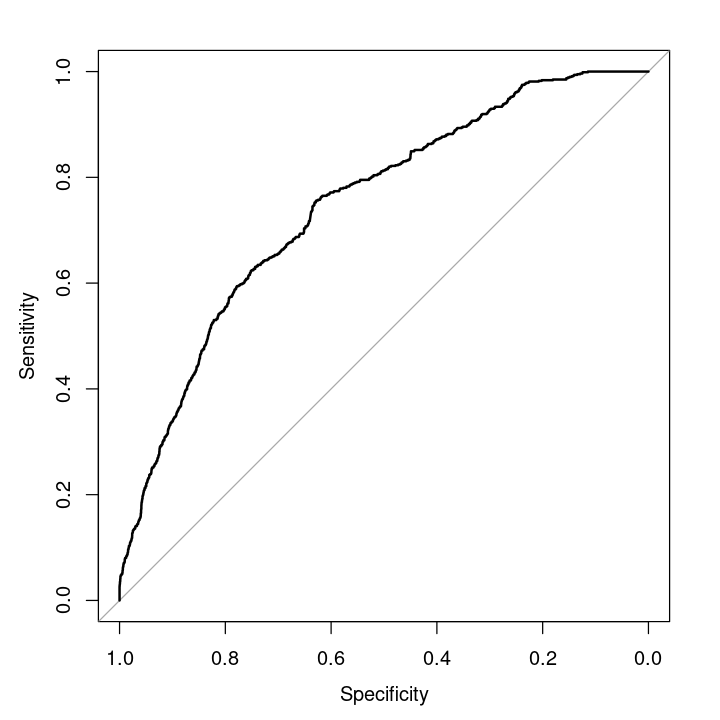

In [1921]:
options(repr.plot.width=6, repr.plot.height=6)
roc_fit2<-roc(factor(dym_X_locf$HOSPITAL_EXPIRE_FLAG)[dym_X_locf$time<=48]~pred2)
print(auc(roc_fit2))
plot(roc_fit2)

In [1872]:
summary(fit2)


Call:
glm(formula = factor(HOSPITAL_EXPIRE_FLAG) ~ ., family = binomial(), 
    data = dym_X_locf[dym_X_locf$time <= 48, c(3:15, 17:31)])

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7741  -0.5475  -0.4211  -0.2106   2.8126  

Coefficients:
                            Estimate Std. Error z value Pr(>|z|)    
(Intercept)               -1.300e+01  2.593e+00  -5.016 5.28e-07 ***
GCSVerbal                  1.848e-01  4.075e-02   4.535 5.77e-06 ***
GCSMotor                  -2.229e-01  5.123e-02  -4.351 1.36e-05 ***
GCSEyes                   -3.379e-01  8.094e-02  -4.174 2.99e-05 ***
SBP                       -2.177e-03  2.367e-03  -0.920 0.357638    
HR                         1.228e-03  3.231e-03   0.380 0.703982    
BT                         5.266e-02  5.677e-02   0.928 0.353633    
PFR                       -7.431e-04  6.427e-04  -1.156 0.247552    
UrO                       -1.419e-03  5.365e-04  -2.646 0.008152 ** 
WBC                       -3.079e-02  9.19

### LOCF 填补, 不加入 mask

In [1922]:
dym_X_locf<-dym_X[,c(1,61:ncol(dym_X))]

In [1923]:
for(k in inds){
    tmp<-dym_X_locf[which(dym_X_locf$hadm_id == base_info$HADM_ID[k]),3:13]
    m<-apply(tmp,2,median,na.rm=T)
    tmp[1,][is.na(tmp[1,])]<-m[is.na(tmp[1,])]
    tmp<-lapply(tmp,FUN=fill_NA1)
    dym_X_locf[which(dym_X_locf$hadm_id == base_info$HADM_ID[k]),3:13]<-tmp
}

In [1924]:
for(i in 3:13){
    
    dym_X_locf[[i]][is.na(dym_X_locf[[i]])]<-median(dym_X_locf[[i]],na.rm=T)

}

In [1925]:
dym_X_locf<-merge(dym_X_locf, base_info[,c("HADM_ID","ADMISSION_TYPE","Aids","Hm","Mc")],
                  by.x="hadm_id",by.y="HADM_ID",all.x=T)

In [1926]:
dym_X_locf[1:2,]

,hadm_id,time,GCSVerbal,GCSMotor,GCSEyes,SBP,HR,BT,PFR,UrO,WBC,Sod,Pot,AGE,HOSPITAL_EXPIRE_FLAG,ADMISSION_TYPE.x,ADMISSION_TYPE.y,Aids,Hm,Mc
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>,<fct>,<dbl>,<dbl>,<dbl>
1,100071,0,5,6,4,120.0,89,37.38889,0,100,13.3,138,3.8,58,0,EMERGENCY,EMERGENCY,0,0,0
2,100071,4,5,6,4,113.5,89,37.66667,0,120,13.3,138,3.8,58,0,EMERGENCY,EMERGENCY,0,0,0


In [1927]:
cbind(1:ncol(dym_X_locf),names(dym_X_locf))

1,hadm_id
2,time
3,GCSVerbal
4,GCSMotor
5,GCSEyes
6,SBP
7,HR
8,BT
9,PFR
10,UrO
11,WBC


In [1928]:
fit2<-glm(factor(HOSPITAL_EXPIRE_FLAG)~.,data=dym_X_locf[,c(3:15,17:20)],family=binomial())

In [1929]:
pred2<-predict(fit2, type="response")

Setting levels: control = 0, case = 1

Setting direction: controls < cases



Area under the curve: 0.7238


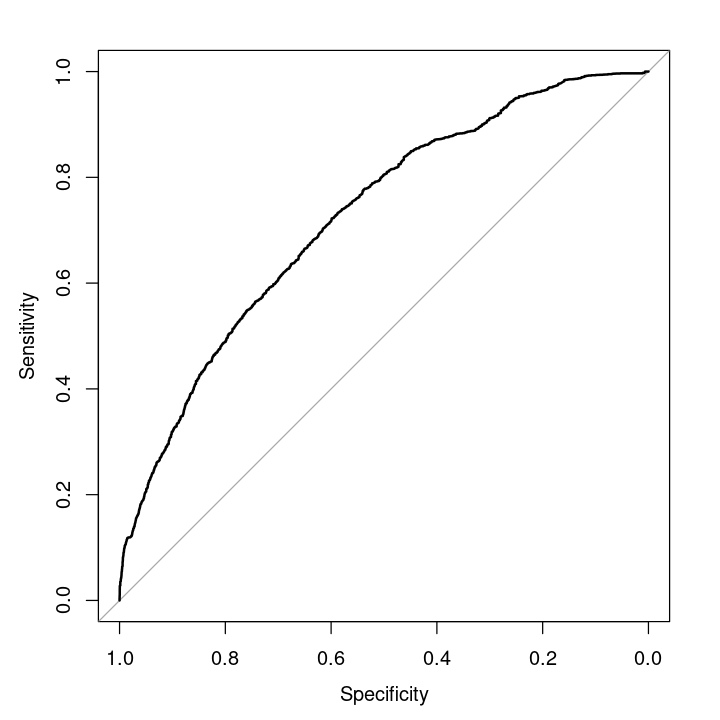

In [1931]:
options(repr.plot.width=6, repr.plot.height=6)
roc_fit2<-roc(factor(dym_X_locf$HOSPITAL_EXPIRE_FLAG)~pred2)
print(auc(roc_fit2))
plot(roc_fit2)

### 只用mask来预测

In [1932]:
dym_X_mask<-dym_X[,c(1,61:ncol(dym_X))]

In [1933]:
dym_X_mask[,3:13]<-lapply(dym_X_mask[,3:13],FUN=function(x) ifelse(is.na(x),1,0))

In [1935]:
names(dym_X_mask)[3:13]<-paste0(names(dym_X_mask)[3:13],"_m")

In [1936]:
dym_X_mask1<-dym_X_mask[,3:13]
names(dym_X_mask1)<-paste0(names(dym_X_mask1),"1")

In [1937]:
for(k in inds){

    tmp1<-dym_X_mask[which(dym_X_mask$hadm_id == base_info$HADM_ID[k]),3:13]
    tmp2<-dym_X_mask[which(dym_X_mask$hadm_id == base_info$HADM_ID[k]),3:13]
    # tmp1<-lapply(tmp1, function(x) cumsum(x/length(x)))
    tws<-1:nrow(tmp1)
    tw<-100
    tw1<-30
    tmp1<-lapply(tmp1, function(x){sapply(tws, function(u) {

        if(u>tw-1) return(sum(x[(u-tw+1):u])/tw) else return(sum(x[1:u])/u)

    })})
    
    tmp2<-lapply(tmp2, function(x){sapply(tws, function(u) {

        if(u>1) {
        
            l<-which(x[1:u]==0)
            if(length(l)==0){
                
                if(u>tw1) return(tw1) else return(u)
            
            } else{
                
                u1<-u-l[length(l)]
                
                if(u1>tw1) return(tw1) else return(u1)
            
            }
        
        } else return(0)

    })})
    
    dym_X_mask[which(dym_X_mask$hadm_id == base_info$HADM_ID[k]),3:13]<-tmp1
    dym_X_mask1[which(dym_X_mask$hadm_id == base_info$HADM_ID[k]),]<-tmp2
}

In [1938]:
dym_X_mask<-cbind(dym_X_mask,dym_X_mask1)

In [1939]:
dym_X_mask<-merge(dym_X_mask, base_info[,c("HADM_ID","ADMISSION_TYPE","Aids","Hm","Mc")],
                  by.x="hadm_id",by.y="HADM_ID",all.x=T)

In [1944]:
dym_X_mask[1:4,]

,hadm_id,time,GCSVerbal_m,GCSMotor_m,GCSEyes_m,SBP_m,HR_m,BT_m,PFR_m,UrO_m,⋯,BT_m1,PFR_m1,UrO_m1,WBC_m1,Sod_m1,Pot_m1,ADMISSION_TYPE.y,Aids,Hm,Mc
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>
1,100071,0,0.0000000,0.0000000,0.0000000,0,0,0,1,0,⋯,0,0,0,0,0,0,EMERGENCY,0,0,0
2,100071,4,0.0000000,0.0000000,0.0000000,0,0,0,1,0,⋯,0,2,0,1,1,1,EMERGENCY,0,0,0
3,100071,8,0.3333333,0.3333333,0.3333333,0,0,0,1,0,⋯,0,3,0,2,2,2,EMERGENCY,0,0,0
4,100071,12,0.2500000,0.2500000,0.2500000,0,0,0,1,0,⋯,0,4,0,3,3,3,EMERGENCY,0,0,0


In [1940]:
cbind(1:ncol(dym_X_mask),names(dym_X_mask))

1,hadm_id
2,time
3,GCSVerbal_m
4,GCSMotor_m
5,GCSEyes_m
6,SBP_m
7,HR_m
8,BT_m
9,PFR_m
10,UrO_m
11,WBC_m


In [1941]:
fit3<-glm(factor(HOSPITAL_EXPIRE_FLAG)~.,data=dym_X_mask[,c(3:15,17:27,28:31)],family=binomial())

In [1942]:
pred3<-predict(fit3, type="response")

Setting levels: control = 0, case = 1

Setting direction: controls < cases



Area under the curve: 0.7354


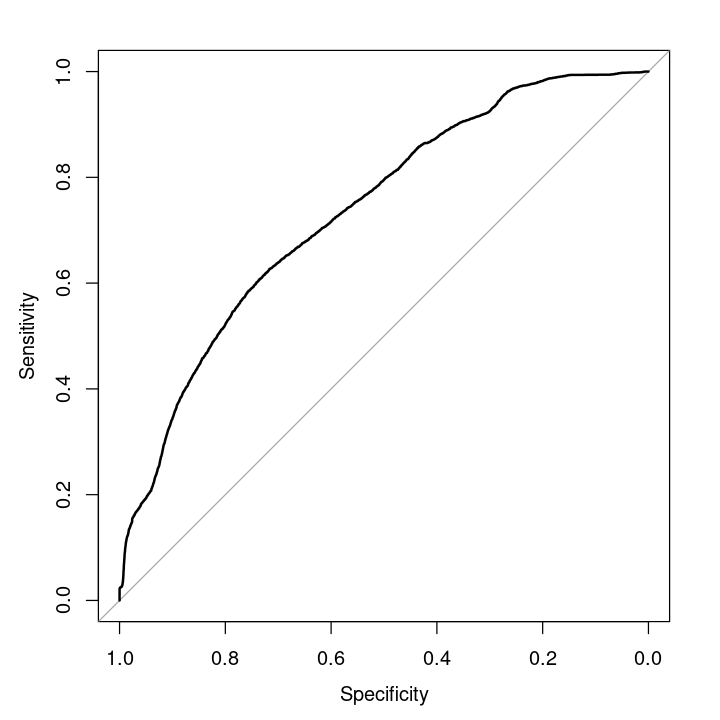

In [1943]:
options(repr.plot.width=6, repr.plot.height=6)
roc_fit3<-roc(factor(dym_X_mask$HOSPITAL_EXPIRE_FLAG)~pred3)
print(auc(roc_fit3))
plot(roc_fit3)

In [1945]:
summary(fit3)


Call:
glm(formula = factor(HOSPITAL_EXPIRE_FLAG) ~ ., family = binomial(), 
    data = dym_X_mask[, c(3:15, 17:27, 28:31)])

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.5213  -0.6490  -0.4882  -0.2529   2.9718  

Coefficients:
                            Estimate Std. Error z value Pr(>|z|)    
(Intercept)               -2.767e+00  1.507e-01 -18.365  < 2e-16 ***
GCSVerbal_m                1.480e+01  1.158e+00  12.781  < 2e-16 ***
GCSMotor_m                -2.610e+01  3.592e+00  -7.268 3.66e-13 ***
GCSEyes_m                  1.341e+01  3.398e+00   3.946 7.96e-05 ***
SBP_m                      7.904e+00  1.264e+00   6.253 4.03e-10 ***
HR_m                      -9.466e+00  1.354e+00  -6.990 2.74e-12 ***
BT_m                       5.492e-01  1.728e-01   3.178 0.001484 ** 
PFR_m                     -4.119e-01  1.301e-01  -3.166 0.001544 ** 
UrO_m                     -1.052e+00  1.193e-01  -8.816  < 2e-16 ***
WBC_m                      8.994e-01  2.159e-01   4.165 

### 画图查看填补情况

In [1904]:
dym_X_locf[1:3,]

,hadm_id,time,GCSVerbal,GCSMotor,GCSEyes,SBP,HR,BT,PFR,UrO,WBC,Sod,Pot,AGE,HOSPITAL_EXPIRE_FLAG,ADMISSION_TYPE.x,ADMISSION_TYPE.y,Aids,Hm,Mc
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>,<fct>,<dbl>,<dbl>,<dbl>
1,100071,0,5,6,4,120.0,89,37.38889,0,100,13.3,138,3.8,58,0,EMERGENCY,EMERGENCY,0,0,0
2,100071,4,5,6,4,113.5,89,37.66667,0,120,13.3,138,3.8,58,0,EMERGENCY,EMERGENCY,0,0,0
3,100071,8,5,6,4,117.5,92,37.66667,0,145,13.3,138,3.8,58,0,EMERGENCY,EMERGENCY,0,0,0


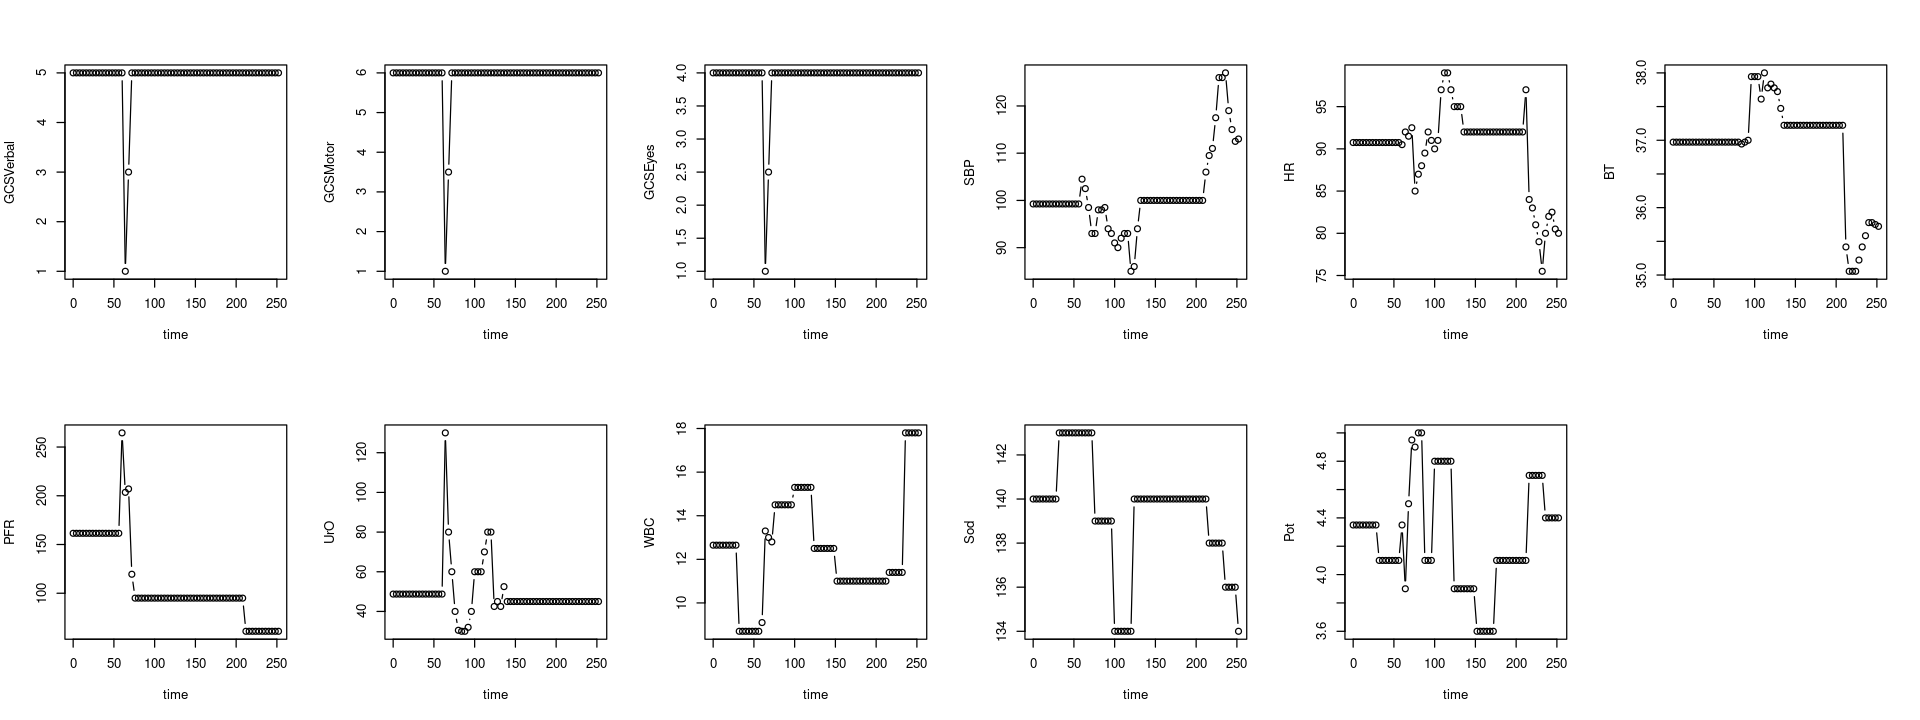

In [1908]:
options(repr.plot.width=16, repr.plot.height=6)

par(mfrow=c(2,6))

for(i in 3:13){
    
     plot(x=dym_X_locf[which(dym_X_locf$hadm_id == base_info$HADM_ID[inds[20]]),2],
          y=dym_X_locf[which(dym_X_locf$hadm_id == base_info$HADM_ID[inds[20]]),i],type="b",
          ylab=names(dym_X_locf)[i],xlab="time")

}



### 栅格图

In [2003]:
dym_X_mask<-dym_X[,c(1,61:ncol(dym_X))]

In [2004]:
dym_X_mask[1:2,]

,hadm_id,time,GCSVerbal,GCSMotor,GCSEyes,SBP,HR,BT,PFR,UrO,WBC,Sod,Pot,AGE,HOSPITAL_EXPIRE_FLAG,ADMISSION_TYPE
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>
1,100071,0,5,6,4,120.0,89,37.38889,NA,100,13.3,138,3.8,58,0,EMERGENCY
2,100071,4,5,6,4,113.5,89,37.66667,NA,120,NA,NA,NA,58,0,EMERGENCY


In [2019]:
k<-60

tmp<-dym_X_mask[dym_X_mask$hadm_id==base_info$HADM_ID[inds[k]],3:13]
tmp<-as.data.frame(lapply(tmp, function(x) ifelse(is.na(x),1,0)))
tmp<-as.matrix(tmp)

In [2020]:
row.names(tmp)<-dym_X_mask[dym_X_mask$hadm_id==base_info$HADM_ID[inds[k]],"time"]

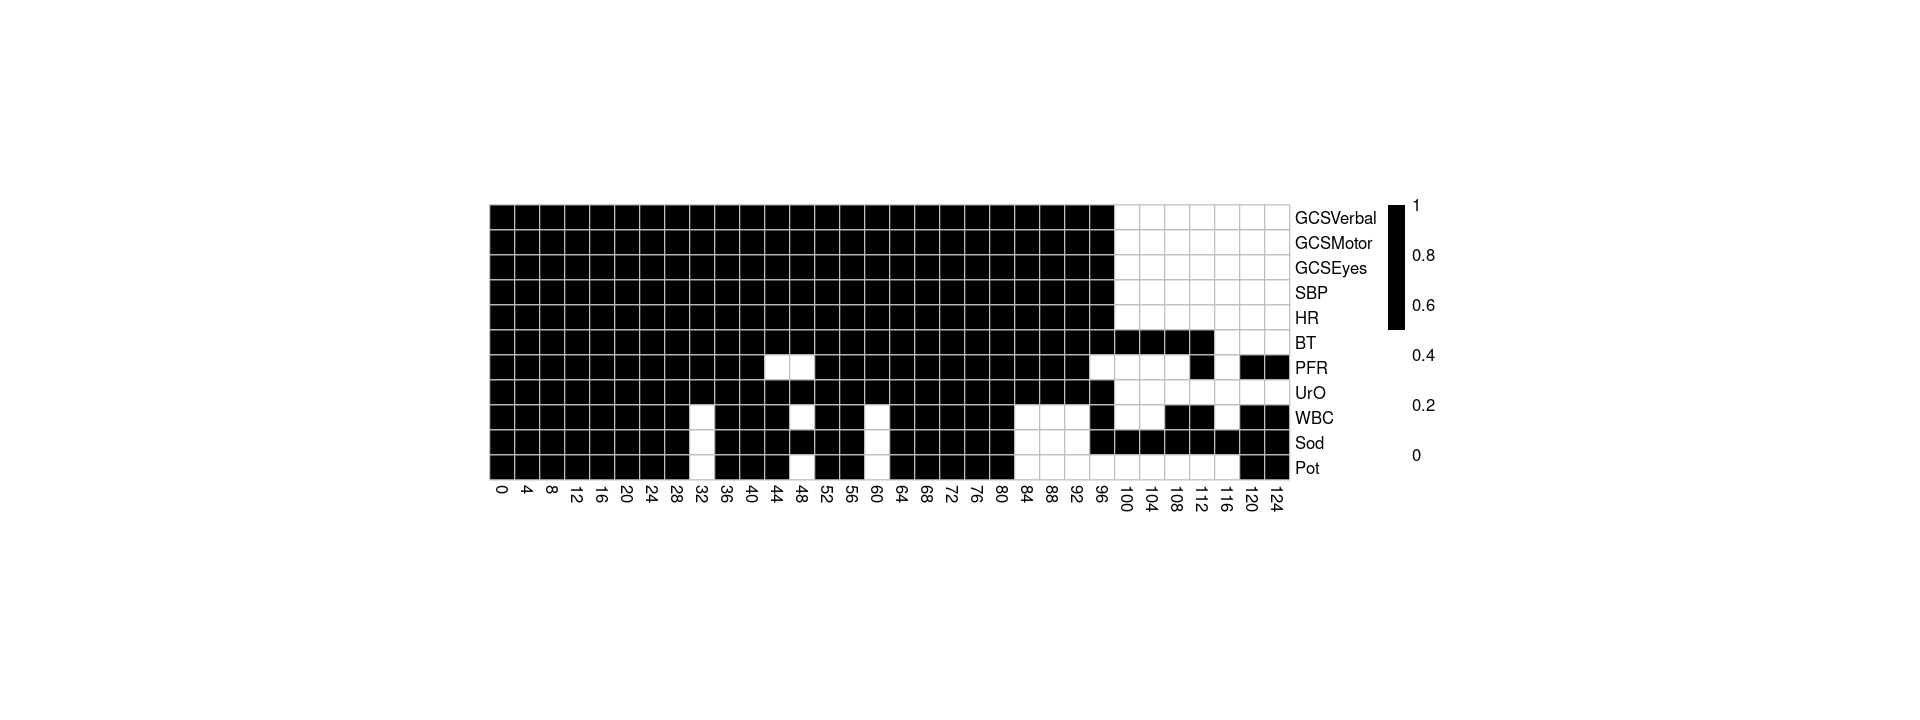

In [2021]:
options(repr.plot.width=16, repr.plot.height=6)
pheatmap(t(tmp), cluster_rows = F,cluster_cols = F,
border_color = "grey",
cellwidth=15, cellheight=15,
color = colorRampPalette(c("white", "black"))(2))

### 不同类别的mask图

In [394]:
base_info<-fread("./base_info.csv",header=T,fill=T)

In [395]:
base_info[1:4,]

SUBJECT_ID,ROW_ID.x,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG,ROW_ID.y,HADM_ID,⋯,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA,AGE,TOTAL_LOS,Aids,Hm,Mc,cluster
<int>,<int>,<chr>,<dttm>,<dttm>,<dttm>,<dttm>,<int>,<int>,<int>,⋯,<dttm>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
3,2,M,2025-04-11,2102-06-14,NA,2102-06-14,1,2,145834,⋯,2101-10-20 19:24:00,HYPOTENSION,0,1,78,258,0,0,0,1
4,3,F,2143-05-12,NA,NA,NA,0,3,185777,⋯,2191-03-16 01:10:00,"FEVER,DEHYDRATION,FAILURE TO THRIVE",0,1,49,186,1,0,0,4
6,5,F,2109-06-21,NA,NA,NA,0,5,107064,⋯,NA,CHRONIC RENAL FAILURE/SDA,0,1,67,392,0,0,0,3
9,8,M,2108-01-26,2149-11-14,2149-11-14,2149-11-14,1,8,150750,⋯,2149-11-09 13:18:00,HEMORRHAGIC CVA,1,1,43,117,0,0,0,2


In [396]:
#cbind(seq(4,200,4),
#sapply(seq(4,200,4), function(x) sum(base_info$TOTAL_LOS>=x)/nrow(base_info)))

In [397]:
cluster<-fread("/home/luojiawei/mimic3_Miss_project/labels_cnn_autoencoder.csv",header=T)

In [398]:
base_info$cluster<-cluster$cluster+1

In [399]:
range(base_info$cluster)

[1] 1 5

In [18]:
quantile(base_info$TOTAL_LOS[which(base_info$cluster==2)], seq(0,1,0.1))

0%    10%    20%    30%    40%    50%    60%    70%    80%    90%   100% 
  49.0   89.0  114.6  138.0  162.0  193.0  234.0  290.0  381.0  545.2 4954.0

In [19]:
table(base_info$cluster)


   1    2    3    4    5 
4941 9049 4280 7156 2732 

In [20]:
aggregate(base_info[,c("HOSPITAL_EXPIRE_FLAG","TOTAL_LOS")],
          by=base_info[,c("cluster"),drop=F],
          function(x) return(round(c(mean(x),median(x),sd(x)),3)))

cluster,HOSPITAL_EXPIRE_FLAG,TOTAL_LOS
<dbl>,"<dbl[,3]>","<dbl[,3]>"
1,"0.158, 0, 0.365","373.705, 280, 309.424"
2,"0.159, 0, 0.366","274.237, 193, 267.771"
3,"0.027, 0, 0.162","137.126, 102, 113.748"
4,"0.076, 0, 0.266","198.283, 144, 181.369"
5,"0.083, 0, 0.276","233.543, 172, 202.992"


In [21]:
dim(mask1)

ERROR: Error in eval(expr, envir, enclos): object 'mask1' not found


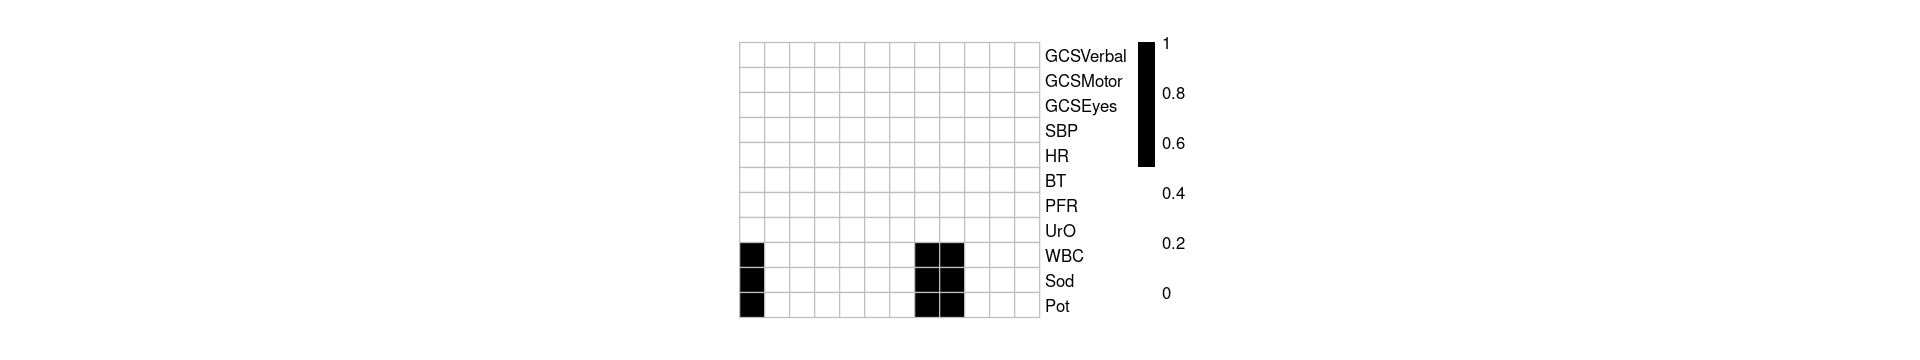

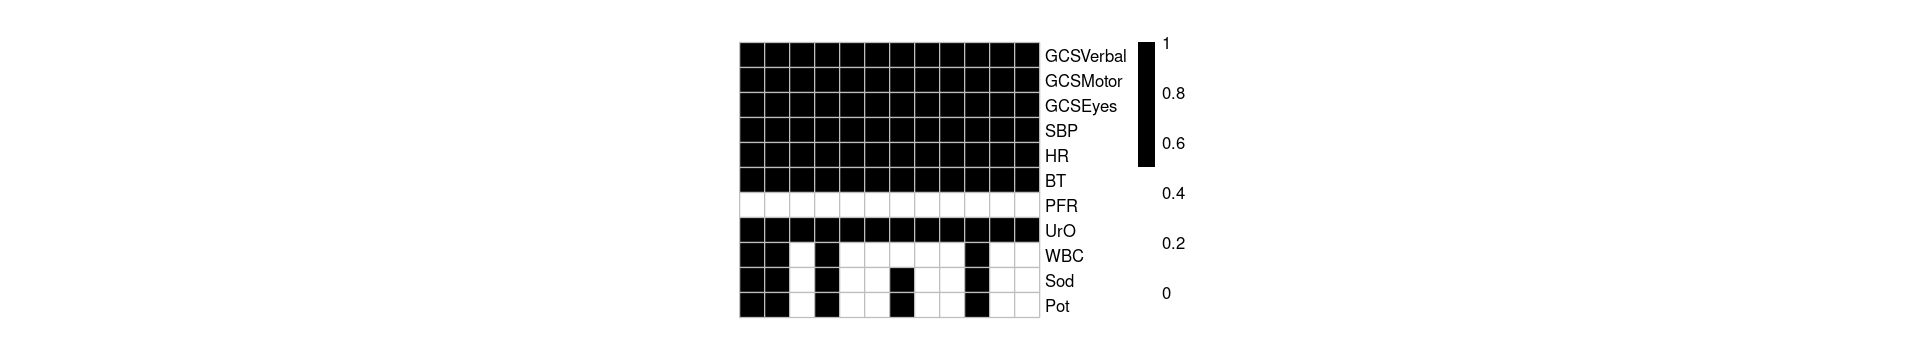

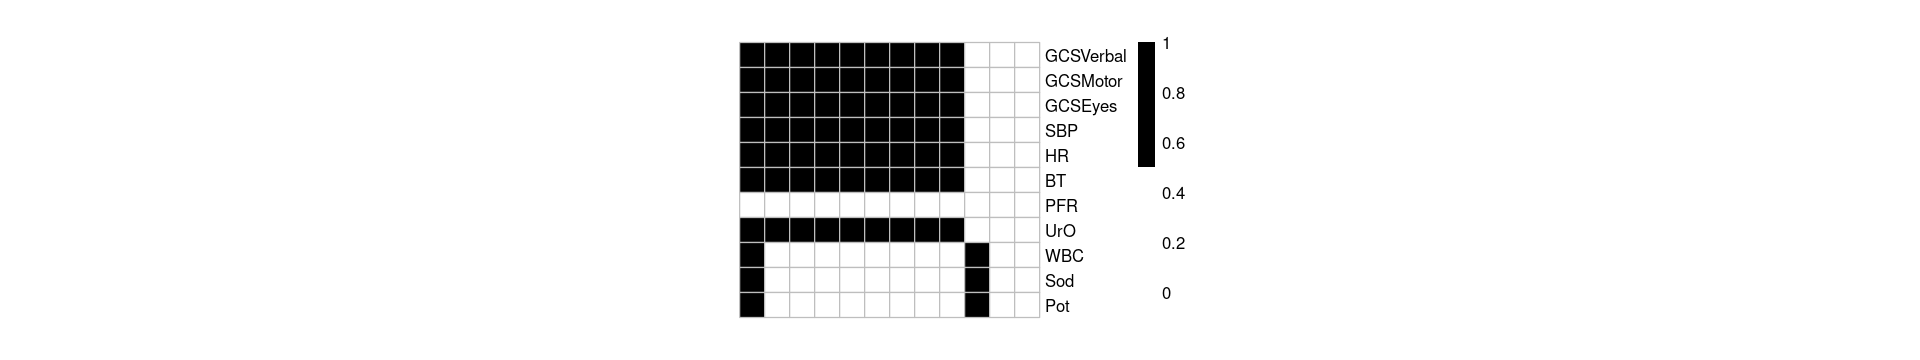

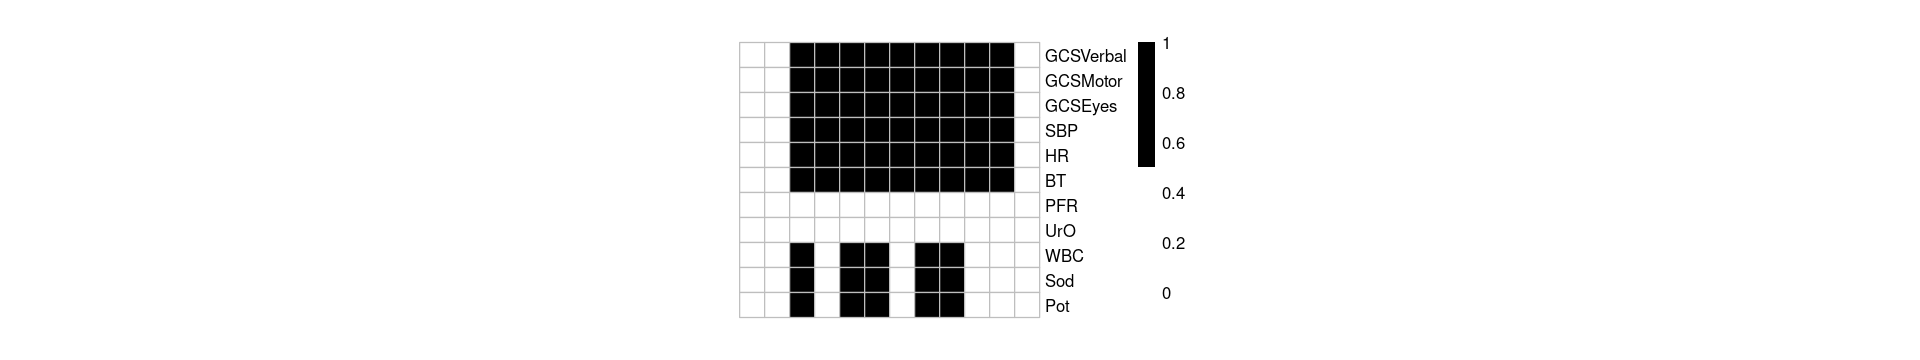

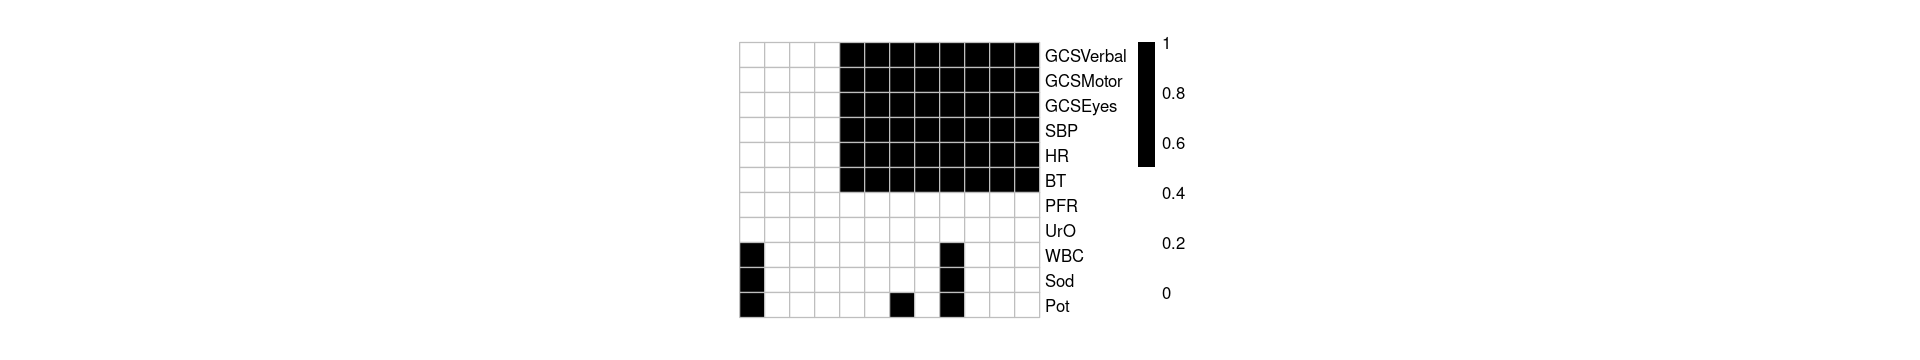

In [23]:
options(repr.plot.width=16, repr.plot.height=3)

for(i in 1:5){

    index<-sample(which(base_info$cluster==i),size=1)
    cur_hadm_id<-base_info$HADM_ID[index]
    folder_path<-paste0("./all_admissions/", cur_hadm_id)
    mask<-fread(paste0(folder_path,"/","mask.csv"),header=T)
    mask1<-as.matrix(mask)
    
    if(nrow(mask1)>=12) mask1<-mask1[1:12,] else mask1<-rbind(mask1,matrix(1,nrow=18-nrow(mask1), ncol=11))
    
    pheatmap(t(1-mask1), cluster_rows = F,cluster_cols = F,
            border_color = "grey",
            cellwidth=15, cellheight=15,
            color = colorRampPalette(c("white", "black"))(2))
}

In [349]:
# 划分训练集和测试集
set.seed(1234)
train_index <- list()
test_index <- list()
for (i in 1:max(base_info$cluster)) {
  cur_cluster <- base_info$HADM_ID[which(base_info$cluster == i)]
  train_index[[i]] <- sample(cur_cluster, floor(0.7 * length(cur_cluster)))
  test_index[[i]] <- setdiff(cur_cluster, train_index[[i]])
}

In [2378]:
max(base_info$cluster)

[1] 5

In [2379]:
for (i in 1:max(base_info$cluster)) {
    fwrite(base_info[which(base_info$HADM_ID %in% train_index[[i]]),c("HADM_ID", "HOSPITAL_EXPIRE_FLAG", "cluster"),drop=F],file=paste0("./train_cls",i,".csv"),row.names=F)
    fwrite(base_info[which(base_info$HADM_ID %in% test_index[[i]]),c("HADM_ID", "HOSPITAL_EXPIRE_FLAG", "cluster"),drop=F],file=paste0("./test_cls",i,".csv"),row.names=F)
}

In [2380]:
fwrite(base_info[which(base_info$HADM_ID %in% unlist(train_index)), c("HADM_ID", "HOSPITAL_EXPIRE_FLAG", "cluster"),drop=F], file="./train.csv",row.names=F)
fwrite(base_info[which(base_info$HADM_ID %in% unlist(test_index)), c("HADM_ID", "HOSPITAL_EXPIRE_FLAG", "cluster"),drop=F], file="./test.csv",row.names=F)

### 数据集描述

In [568]:
train <- fread("./train.csv", header = TRUE, fill = TRUE)
test <- fread("./test.csv", header = TRUE, fill = TRUE)
valid<- fread("./valid.csv", header = TRUE, fill = TRUE)

In [569]:
train_index<-which(base_info$HADM_ID %in% c(train$HADM_ID,valid$HADM_ID))
test_index<-which(base_info$HADM_ID %in% test$HADM_ID)

In [589]:
base_info$group<-rep("1",nrow(base_info))
base_info$group[test_index]<-"2"
# base_info$group<-factor(base_info$group)
base_info$death_within_90d<-as.integer(!is.na(base_info$DOD) & (base_info$TOTAL_LOS<=90*24))

In [571]:
table(base_info$group)


    1     2 
19711  8447 

In [590]:
base_info$TOTAL_LOS_cls<-cut(base_info$TOTAL_LOS, breaks = c(seq(48,24*7*4,24*7),Inf),right=F)

In [591]:
names(base_info)

[1] "SUBJECT_ID"           "ROW_ID.x"             "GENDER"              
 [4] "DOB"                  "DOD"                  "DOD_HOSP"            
 [7] "DOD_SSN"              "EXPIRE_FLAG"          "ROW_ID.y"            
[10] "HADM_ID"              "ADMITTIME"            "DISCHTIME"           
[13] "DEATHTIME"            "ADMISSION_TYPE"       "ADMISSION_LOCATION"  
[16] "DISCHARGE_LOCATION"   "INSURANCE"            "LANGUAGE"            
[19] "RELIGION"             "MARITAL_STATUS"       "ETHNICITY"           
[22] "EDREGTIME"            "EDOUTTIME"            "DIAGNOSIS"           
[25] "HOSPITAL_EXPIRE_FLAG" "HAS_CHARTEVENTS_DATA" "AGE"                 
[28] "TOTAL_LOS"            "Aids"                 "Hm"                  
[31] "Mc"                   "cluster"              "group"               
[34] "TOTAL_LOS_cls"        "death_within_90d"

In [594]:
vars <- c("AGE","TOTAL_LOS_cls","GENDER", "Aids", "Hm", "Mc", "HOSPITAL_EXPIRE_FLAG","death_within_90d","ADMISSION_TYPE")
vars_str <- setdiff(names(base_info), c("AGE"))
tab<-CreateTableOne(vars = vars,  factorVars = vars_str, strata = "group",data = base_info)
non_norm<-c("AGE")
tab1<-print(tab, nonnormal = non_norm)

                              Stratified by group
                               1                    2                    p     
  n                            19711                 8447                      
  AGE (median [IQR])           67.00 [54.00, 79.00] 66.00 [53.00, 79.00]  0.046
  TOTAL_LOS_cls (%)                                                       0.948
     [48,216)                  12174 (61.8)          5191 (61.5)               
     [216,384)                  4414 (22.4)          1901 (22.5)               
     [384,552)                  1585 ( 8.0)           681 ( 8.1)               
     [552,Inf)                  1538 ( 7.8)           674 ( 8.0)               
  GENDER = M (%)               11237 (57.0)          4792 (56.7)          0.675
  Aids = 1 (%)                   164 ( 0.8)            70 ( 0.8)          1.000
  Hm = 1 (%)                     490 ( 2.5)           226 ( 2.7)          0.376
  Mc = 1 (%)                    1321 ( 6.7)           575 ( 6.8)      

In [595]:
# 使用与上面相同的变量和参数，但是不分 group，将 train 和 test 数据集的结果横向拼接
vars <- c("AGE","TOTAL_LOS_cls","GENDER", "Aids", "Hm", "Mc", "HOSPITAL_EXPIRE_FLAG","death_within_90d","ADMISSION_TYPE")
vars_str <- setdiff(names(base_info), c("AGE"))
table_all<-CreateTableOne(vars = vars,  factorVars = vars_str, data = base_info)
non_norm<-c("AGE")
tab_all<-print(table_all, nonnormal = non_norm)

                              
                               Overall             
  n                            28158               
  AGE (median [IQR])           67.00 [54.00, 79.00]
  TOTAL_LOS_cls (%)                                
     [48,216)                  17365 (61.7)        
     [216,384)                  6315 (22.4)        
     [384,552)                  2266 ( 8.0)        
     [552,Inf)                  2212 ( 7.9)        
  GENDER = M (%)               16029 (56.9)        
  Aids = 1 (%)                   234 ( 0.8)        
  Hm = 1 (%)                     716 ( 2.5)        
  Mc = 1 (%)                    1896 ( 6.7)        
  HOSPITAL_EXPIRE_FLAG = 1 (%)  3109 (11.0)        
  death_within_90d = 1 (%)     10229 (36.3)        
  ADMISSION_TYPE (%)                               
     ELECTIVE                   4936 (17.5)        
     EMERGENCY                 22401 (79.6)        
     URGENT                      821 ( 2.9)        


In [596]:
cbind(tab_all, tab1)

,Overall,1,2,p,test
n,28158,19711,8447,,
AGE (median [IQR]),"67.00 [54.00, 79.00]","67.00 [54.00, 79.00]","66.00 [53.00, 79.00]",0.046,nonnorm
TOTAL_LOS_cls (%),,,,0.948,
"[48,216)",17365 (61.7),12174 (61.8),5191 (61.5),,
"[216,384)",6315 (22.4),4414 (22.4),1901 (22.5),,
"[384,552)",2266 ( 8.0),1585 ( 8.0),681 ( 8.1),,
"[552,Inf)",2212 ( 7.9),1538 ( 7.8),674 ( 8.0),,
GENDER = M (%),16029 (56.9),11237 (57.0),4792 (56.7),0.675,
Aids = 1 (%),234 ( 0.8),164 ( 0.8),70 ( 0.8),1.000,
Hm = 1 (%),716 ( 2.5),490 ( 2.5),226 ( 2.7),0.376,


In [558]:
# 读取 dym_X-light
dym_X_light <- fread("/home/luojiawei/mimic3_Miss_project/dym_X-light.csv", header = TRUE, fill = TRUE)

In [560]:
cbind(1:ncol(dym_X_light),names(dym_X_light))

1,hadm_id
2,time
3,GCSVerbal
4,GCSMotor
5,GCSEyes
6,SBP
7,HR
8,BT
9,PFR
10,UrO
11,SUN


In [561]:
# 把 mask 的每一列转换成 0 / 1                               
mask <- as.data.frame(lapply(dym_X_light[, c(3:16)], function(x) ifelse(is.na(x), 1, 0)))

In [562]:
mask[1:2,]

,GCSVerbal,GCSMotor,GCSEyes,SBP,HR,BT,PFR,UrO,SUN,WBC,Ser,Sod,Pot,Bil
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [563]:
table_missing <- CreateTableOne(vars = names(mask), data = mask, factorVars = names(mask), test = FALSE)
table_missing1<-print(table_missing)
as.data.frame(table_missing1)

                   
                    Overall        
  n                 1760566        
  GCSVerbal = 1 (%) 1043179 (59.3) 
  GCSMotor = 1 (%)  1043741 (59.3) 
  GCSEyes = 1 (%)   1041774 (59.2) 
  SBP = 1 (%)        994828 (56.5) 
  HR = 1 (%)         988265 (56.1) 
  BT = 1 (%)        1104406 (62.7) 
  PFR = 1 (%)       1514786 (86.0) 
  UrO = 1 (%)       1366703 (77.6) 
  SUN = 1 (%)       1347791 (76.6) 
  WBC = 1 (%)       1382086 (78.5) 
  Ser = 1 (%)       1356679 (77.1) 
  Sod = 1 (%)       1340631 (76.1) 
  Pot = 1 (%)       1247163 (70.8) 
  Bil = 1 (%)       1664759 (94.6) 


,Overall
,<chr>
n,1760566
GCSVerbal = 1 (%),1043179 (59.3)
GCSMotor = 1 (%),1043741 (59.3)
GCSEyes = 1 (%),1041774 (59.2)
SBP = 1 (%),994828 (56.5)
HR = 1 (%),988265 (56.1)
BT = 1 (%),1104406 (62.7)
PFR = 1 (%),1514786 (86.0)
UrO = 1 (%),1366703 (77.6)


95% 
672

Warning message:
“Removed 492 rows containing non-finite values (`stat_bin()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_bar()`).”


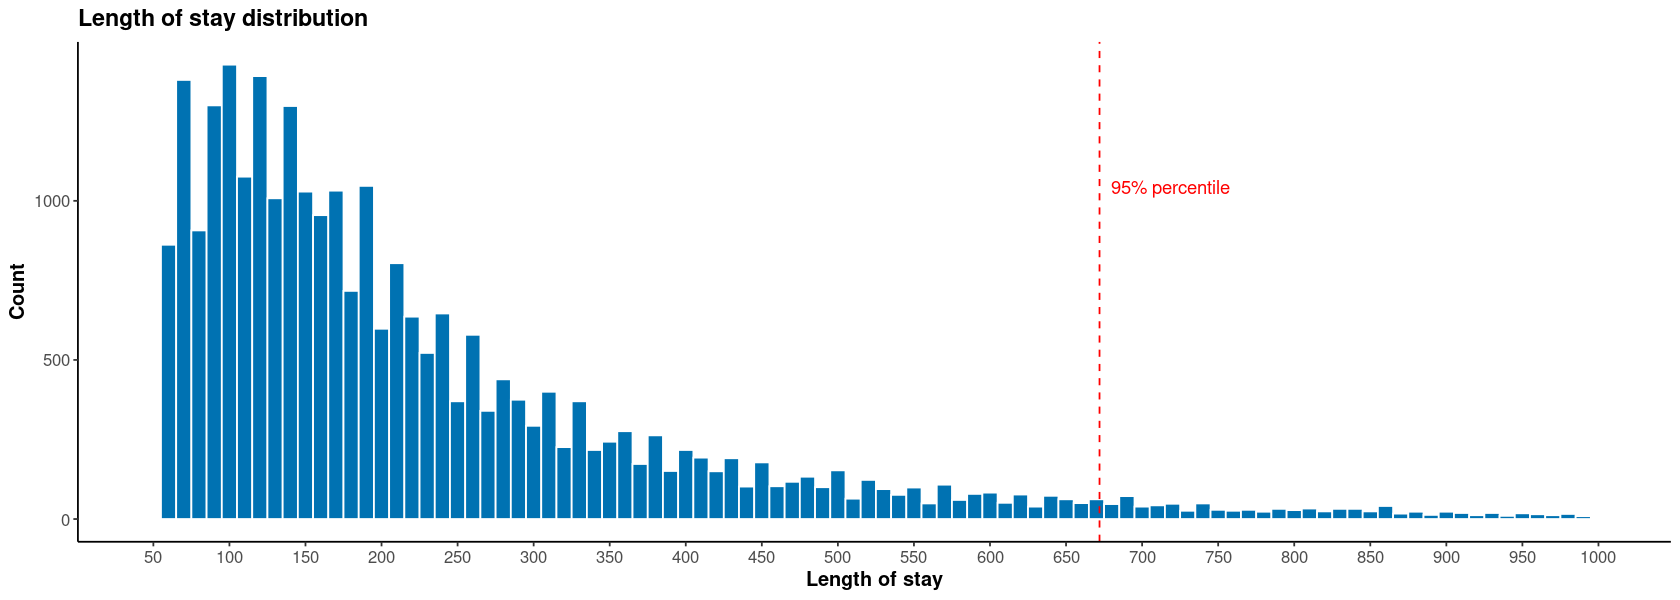

In [535]:
qq <- quantile(base_info$TOTAL_LOS, 0.95, na.rm = TRUE)
qq
ggplot(base_info, aes(x = TOTAL_LOS)) +
  geom_histogram(fill = "#0072B2", color = "#FFFFFF", binwidth = 10) +
  geom_vline(xintercept = qq, linetype = "dashed", color = "red") +
  annotate("text", x = qq, y = 1000, label = "95% percentile", color = "red", 
           hjust = -0.1, vjust = -0.5) +
  ggtitle("Length of stay distribution") +
  xlab("Length of stay") +
  ylab("Count") +
  scale_x_continuous(limits = c(48, 1000), breaks = seq(50, 1000, by = 50)) +
  theme(plot.title = element_text(size = 14, face = "bold"),
        axis.title = element_text(size = 12, face = "bold"),
        axis.text = element_text(size = 10),
        axis.line = element_line(size = 0.5, colour = "black"),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        panel.border = element_blank(),
        panel.background = element_blank())


In [537]:
table(base_info$cluster)
prop.table(table(base_info$cluster))


   1    2    3    4    5 
7151 4939 4270 9065 2733 


         1          2          3          4          5 
0.25395980 0.17540308 0.15164429 0.32193338 0.09705945 

In [577]:
nrow(train) + nrow(valid)

[1] 19711

In [578]:
nrow(test)

[1] 8447

In [587]:
dym_X_light[1:5,]

hadm_id,time,GCSVerbal,GCSMotor,GCSEyes,SBP,HR,BT,PFR,UrO,⋯,Pot,Bil,AGE,HOSPITAL_EXPIRE_FLAG,Aids,Hm,Mc,ADtype1,ADtype2,ADtype3
<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
100007,0,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,75,0,0,0,0,0,0,1
100007,4,1,6,3.5,157,67,35.38889,NA,80,⋯,4.1,NA,75,0,0,0,0,0,0,1
100007,8,5,6,4.0,145,76,36.61111,NA,80,⋯,NA,NA,75,0,0,0,0,0,0,1
100007,12,5,6,4.0,137,82,37.55556,NA,80,⋯,NA,NA,75,0,0,0,0,0,0,1
100007,16,5,6,4.0,131,82,37.13889,NA,60,⋯,NA,NA,75,0,0,0,0,0,0,1
